14
{'AX': False, 'B': False, 'BZ': False, 'A': False, 'BX': False, '4': False, '6': False, 'BY': False, 'R': False, '3': False, '2': False, '1': False, '5': False, 'AY': False}
R
A
AX
AY
B
BX
BY
BZ
1
2
3
4
5
6
{'AX': False, 'B': False, 'BZ': False, 'A': False, 'BX': False, '4': False, '6': False, 'BY': False, 'R': False, '3': False, '2': False, '1': False, '5': False, 'AY': False}
R
A
AX
AY
B
BX
BY
BZ
1
2
3
4
5
6
graph Tree { 
	R -- A;
	R -- B;
	A -- AX;
	A -- AY;
	B -- BX;
	B -- BY;
	B -- BZ;
	BZ -- 1;
	BZ -- 2;
	BZ -- 3;
	BZ -- 4;
	BZ -- 5;
	BZ -- 6;
 } 


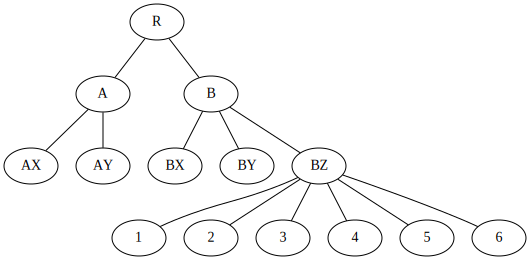

graph Tree { 
	r -- L;
	r -- R;
	L -- LL;
	L -- LR;
	R -- RL;
	R -- RM;
	R -- RR;
	RR -- a;
	RR -- b;
	RR -- c;
	RR -- d;
	RR -- e;
	RR -- f;
 } 


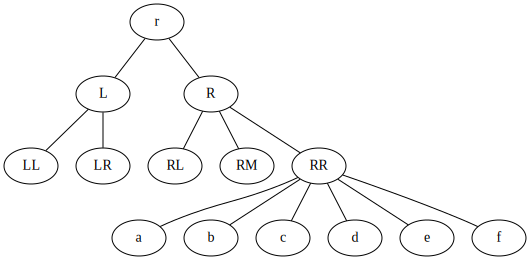

In [17]:
%run tree_isomorphism.py

t1.dfs(print)
t1.render()
t2.render()

